##별 데이터 를 가지고 하는 이진 분류 학습 문제 

In [12]:
#import 
import pandas as pd 
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt
import csv 
import seaborn as sns

In [13]:
#data_load 
df = pd.read_csv('/content/drive/MyDrive/인공지능사관학교/딥러닝/data/pulsar_stars.csv')

In [14]:
#data 정보 확인 
print(df.info())
'''
target_class = 종속변수 (8번)
0~7번 독립 변수 = 8개
'''

display(df.describe())
#딱히 의심되는 이상치 데이터는 없음 but 종속변수의 평균이 낮은것으로 보아 편향 가능성이 있음

print(df.shape) #(17898,8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB
None


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


(17898, 9)


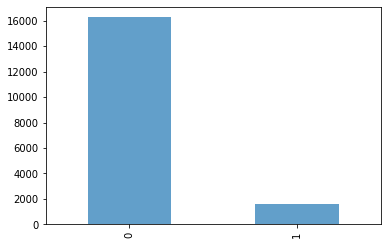

In [21]:
#종속변수 class 별 카운팅 (편향성을 확인하기 위해)
target_count = df['target_class'].value_counts()
'''
0    16259
1     1639
0데이터 가 많은 것을 확인 할수 있다
'''

#barplot 으로 보기 
target_count.plot.bar(target_count,alpha = 0.7)
plt.show()

In [22]:
#csv file 로 데이터 읽어 오기 
with open('/content/drive/MyDrive/인공지능사관학교/딥러닝/data/pulsar_stars.csv') as f:
  csvreader = csv.reader(f)
  next(csvreader) #첫번째 행은 colummn 이라 띄어쓰기 

  rows = []
  for row in csvreader:
    rows.append(row)

  
  data = np.asarray(rows,dtype = 'float32') #numpy 로 변경해서 학습 

  input_cnt,output_cnt = 8,1 #독립 변수 8 ,종속변수 1
  


In [23]:
data
'''
정규화 안할거임 
'''

array([[140.5625    ,  55.68378   ,  -0.23457141, ...,   7.9755316 ,
         74.242226  ,   0.        ],
       [102.50781   ,  58.88243   ,   0.46531814, ...,  10.576487  ,
        127.39358   ,   0.        ],
       [103.015625  ,  39.34165   ,   0.32332838, ...,   7.735822  ,
         63.17191   ,   0.        ],
       ...,
       [119.33594   ,  59.93594   ,   0.1593631 , ...,   2.4995172 ,
          4.595173  ,   0.        ],
       [114.50781   ,  53.9024    ,   0.20116138, ...,  10.007967  ,
        134.2389    ,   0.        ],
       [ 57.0625    ,  85.79734   ,   1.406391  , ...,  -1.5975266 ,
          1.4294753 ,   0.        ]], dtype=float32)

In [24]:
#train_test_index
train_ratio = 0.8

train_test_index = int(train_ratio * data.shape[0])
print(train_test_index)

14318


In [25]:
#shuffle_map 생성 
shuffle_map = np.arange(data.shape[0]) #shuffle 할 데이터를 shape[0] = 행의 크기만큼 생성 
np.random.shuffle(shuffle_map)

print(shuffle_map)

[11235  6140  7129 ...  4445  5241 16856]


In [31]:
#train_test_split

# 1. train/test
train_data = data[shuffle_map[:train_test_index]]
test_data = data[shuffle_map[train_test_index:]] 

#2.독립/종속 
train_x,train_y = train_data[:,:-output_cnt] , train_data[:,-output_cnt:]
test_x,test_y = test_data[:,:-output_cnt],test_data[:,-output_cnt:]

#3.데이터 shape 확인 
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(14318, 8)
(14318, 1)
(3580, 8)
(3580, 1)


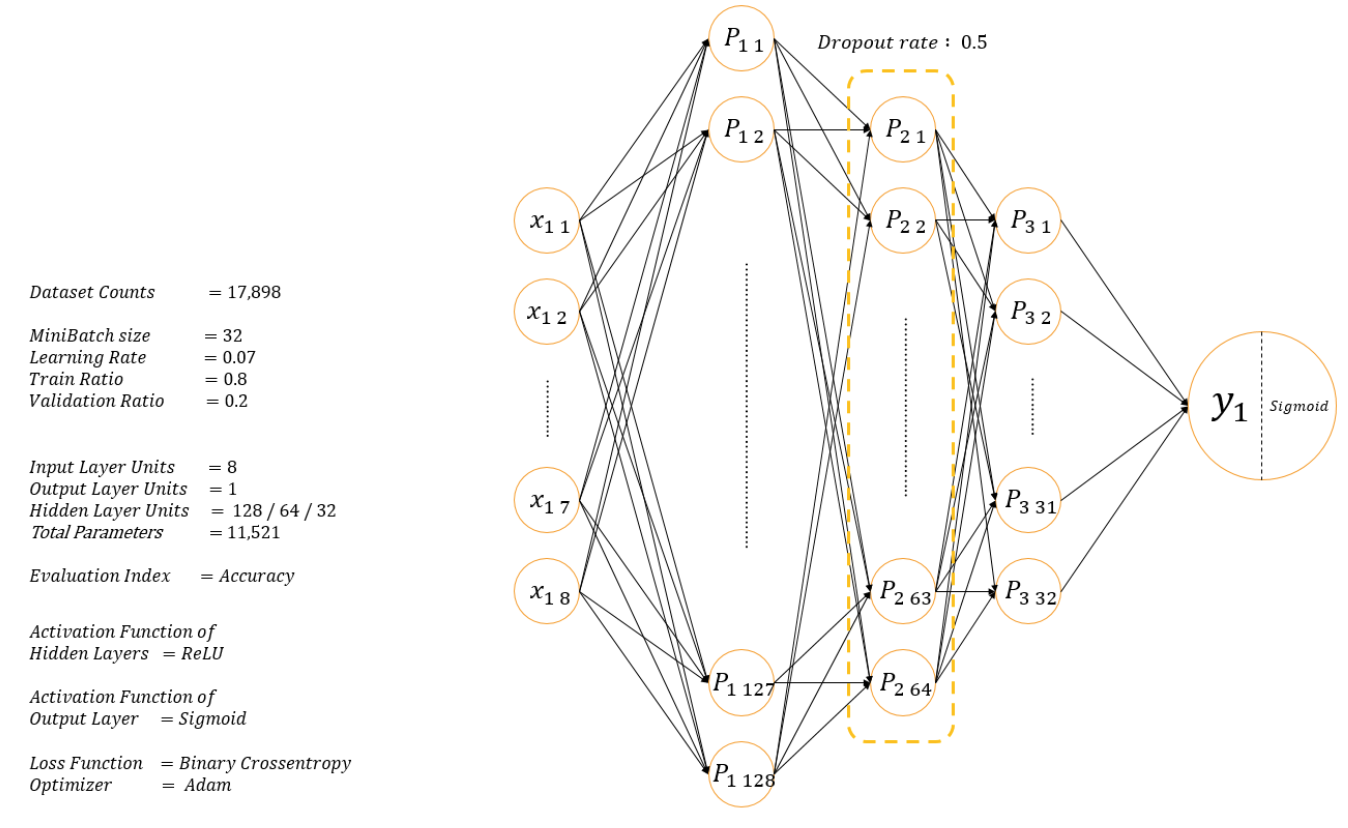

In [34]:
#model making 
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units = 128 , activation = 'relu',input_shape = (8,)),
                             tf.keras.layers.Dense(units = 64 , activation = 'relu'),
                             tf.keras.layers.Dropout(0.5), # 신경망의 과적합 방지를 위한 기법으로 학습 할때의 데이터를 무작위로 비활성화 시킨다 
                             tf.keras.layers.Dense(units = 32 ,activation = 'relu'),
                             tf.keras.layers.Dense(units = 1,activation = 'sigmoid') #확률 값으로 나중에 0 인지 1 인지 판단
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               1152      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 11,521
Trainable params: 11,521
Non-trainable params: 0
_________________________________________________________________


In [81]:
#model compile 
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),loss = 'binary_crossentropy',metrics = ['accuracy']) #이진 분류 이기때문에 loss 를 이진 크로스 엔트로피 모델로 

In [82]:
#model.fit 
history = model.fit(train_x,train_y,epochs = 25,batch_size=32,validation_split=0.2,callbacks= tf.keras.callbacks.EarlyStopping('val_loss',patience = 3))

Epoch 1/25
358/358 [==============================] - 2s 3ms/step - loss: 0.3146 - accuracy: 0.9048 - val_loss: 0.2972 - val_accuracy: 0.9127
Epoch 2/25
358/358 [==============================] - 1s 2ms/step - loss: 0.3144 - accuracy: 0.9048 - val_loss: 0.2969 - val_accuracy: 0.9127
Epoch 3/25
358/358 [==============================] - 1s 2ms/step - loss: 0.3144 - accuracy: 0.9048 - val_loss: 0.2967 - val_accuracy: 0.9127
Epoch 4/25
358/358 [==============================] - 1s 3ms/step - loss: 0.3143 - accuracy: 0.9048 - val_loss: 0.2967 - val_accuracy: 0.9127
Epoch 5/25
358/358 [==============================] - 1s 2ms/step - loss: 0.3143 - accuracy: 0.9048 - val_loss: 0.2967 - val_accuracy: 0.9127
Epoch 6/25
358/358 [==============================] - 1s 3ms/step - loss: 0.3144 - accuracy: 0.9048 - val_loss: 0.2966 - val_accuracy: 0.9127
Epoch 7/25
358/358 [==============================] - 1s 3ms/step - loss: 0.3144 - accuracy: 0.9048 - val_loss: 0.2967 - val_accuracy: 0.9127
Epoch 

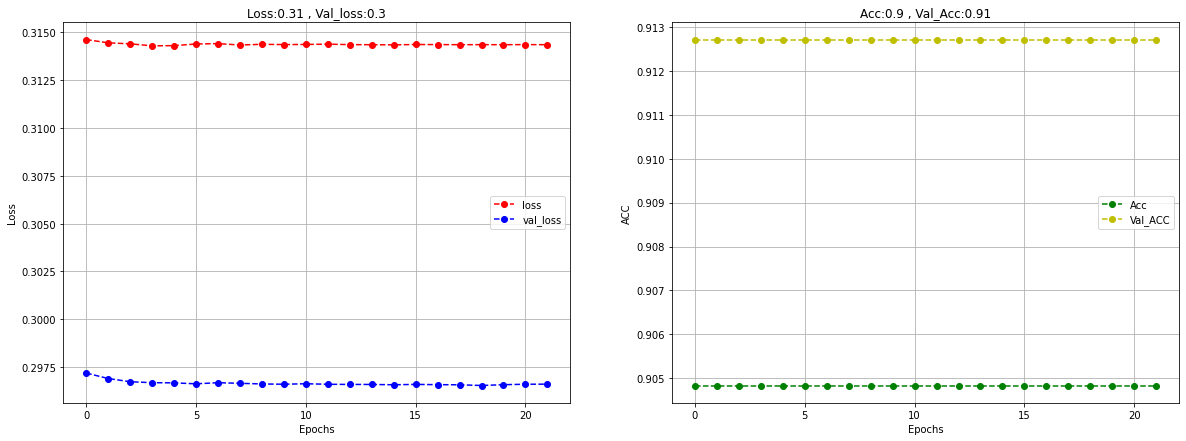

'\nval acc 가 더 큰 현상을 발견 할수 있다  = 학습 이 잘 안됌\n'

In [83]:
loss_mean = np.mean(history.history['loss'])
val_loss_mean = np.mean(history.history['val_loss'])
accuracy_mean = np.mean(history.history['accuracy'])
val_accuracy_mean = np.mean(history.history['val_accuracy'])
#시각화 
plt.figure(figsize = (20,7))
#loss 값 시각화 
plt.subplot(1,2,1)
plt.title('Loss:{} , Val_loss:{}'.format(np.round(loss_mean,2) ,np.round(val_loss_mean,2)))
plt.plot(history.history['loss'],'r--o',label = 'loss')
plt.plot(history.history['val_loss'],'b--o',label = 'val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
#accuracy 값 시각화
plt.subplot(1,2,2)
plt.title('Acc:{} , Val_Acc:{}'.format(np.round(accuracy_mean,2) ,np.round(val_accuracy_mean,2)))
plt.plot(history.history['accuracy'],'g--o',label = 'Acc')
plt.plot(history.history['val_accuracy'],'y--o',label = 'Val_ACC')
plt.xlabel('Epochs')
plt.ylabel('ACC')
plt.grid()
plt.legend()

plt.show()
'''
val acc 가 더 큰 현상을 발견 할수 있다  = 학습 이 잘 안됌
'''

In [84]:
#model predict 
pred_y = model.predict(test_x)
pred_y_3 = np.round(pred_y,3)
print(pred_y_3[:10])

pred_y = np.round(pred_y_3)
print(pred_y[:10]) #round 를 써서 올림 or 내림을 결정 즉 0/1 이외의 값은 나오지 않는다 

[[0.095]
 [0.095]
 [0.095]
 [0.095]
 [0.095]
 [0.095]
 [0.095]
 [0.095]
 [0.095]
 [0.095]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [85]:
'''
정확도가 안나온 이유 
'''
pd.DataFrame(pred_y).value_counts()
#0만 3580개 예상 하는 학습이 잘 안돼는 case 가 나온다.

0.0    3580
dtype: int64

In [86]:
pd.DataFrame(test_y).value_counts()

0.0    3281
1.0     299
dtype: int64

##혼동행렬
###confusion matrix

이진 분류 를 풀때는 평가를 참과 거짓 0/1 
예측 값이 참이다 /예측이 거짓일때 
결과 값이 참이다 / 결과 값이 거짓일때 

2*2 = 4 가지 케이스를 가질수 있다.

참참 = True Positive  - 신경망이 참으로 예측 해서 맞춘 케이스 

거짓 거짓 = True Negative - 신경망이 거짓으로 예측 해서 맞춘 케이스 

거짓 참 = False Negative - 신경망이 거짓으로 예측 했는데 실제 값이 참인 경우

참 거짓 = False Positive - 신경망이 참으로 예측 했는데 실제 값이 거짓인 경우 

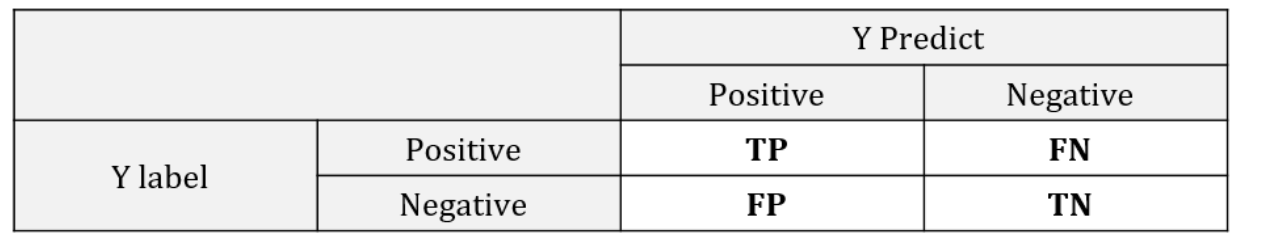

In [87]:
def safe_div(p,q):
  p,q = float(p),float(q)

  if np.abs(q) < 1.0e-20:
    return np.sign(p) #분자의 부호에 맞춰서 출력 양수면 1 음수면 -1 0이면 0
  return p/q

In [88]:
#혼동 행렬 값 구하기 (np.greater(data,수치) :  data 가 0.5보다 큰값이면 True 아니면 False) 
est_yes = np.greater(pred_y,0.5)

ans_yes = np.greater(test_y,0.5)

est_no = np.logical_not(est_yes) #logical_not(data) : 해당 data 에 not 을 하여 저장 

ans_no = np.logical_not(ans_yes) 

In [89]:
print(est_yes[:5])
print(est_no[:5])
print(ans_yes[:5])
print(ans_no[:5])


[[False]
 [False]
 [False]
 [False]
 [False]]
[[ True]
 [ True]
 [ True]
 [ True]
 [ True]]
[[False]
 [False]
 [False]
 [False]
 [False]]
[[ True]
 [ True]
 [ True]
 [ True]
 [ True]]


In [90]:
#TP = 예측 값 실제값을 둘다 True 인경우 
tp = np.sum(np.logical_and(est_yes,ans_yes)) #False 와 False 의 & 는 역시 False = 0 
print(tp)

0


In [91]:
#TN
tn = np.sum(np.logical_and(est_no,ans_no))
print(tn)

3281


In [92]:
#FP 
fp = np.sum(np.logical_and(est_yes,ans_no))
print(fp)

0


In [93]:
#FN
fn = np.sum(np.logical_and(est_no ,ans_yes))
print(fn)

299


In [94]:
#수식으로 precision(정밀도) 와 recall(재현도) 구하기 
precision = tp/(tp+fp)
print(precision)
recall = tp/(tp+fn)
print(recall)
#수식으로 accuracy(정확도) 와 F1 score 구하기 
accuracy = safe_div((tp+tn) , (tp+tn+fp+fn))
print(accuracy)
recall =  2*safe_div((precision * recall),(precision + recall))
print(recall)

nan
0.0
0.9164804469273743
nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in long_scalars
  


In [95]:
#sklearn 으로 구하기 정밀도 재현도 정확도 F1score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

print(confusion_matrix(test_y,pred_y))
print(precision_score(test_y,pred_y))
print(recall_score(test_y,pred_y))
print(accuracy_score(test_y,pred_y))
print(f1_score(test_y,pred_y))

[[3281    0]
 [ 299    0]]
0.0
0.0
0.9164804469273743
0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
